In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

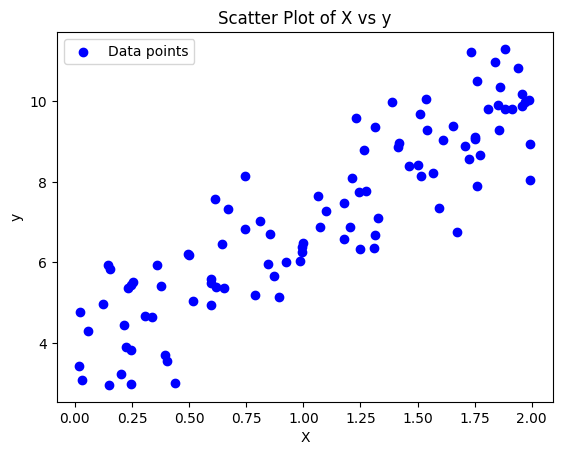

In [3]:
# Plot the data
plt.scatter(X, y, color="blue", label="Data points")  # Scatter plot
plt.xlabel("X")  # Label for X-axis
plt.ylabel("y")  # Label for Y-axis
plt.title("Scatter Plot of X vs y")  # Title of the plot
plt.legend()  # Add a legend
plt.show()  # Display the plot

In [4]:
# Compute theta using the Normal Equation

X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instace
theta_best = (np.linalg.inv(X_b.T.dot(X_b))).dot(X_b.T).dot(y)

In [10]:
theta_best

array([[4.18217234],
       [2.84342935]])

In [11]:
# making predictions using theta_best

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.18217234],
       [9.86903104]])

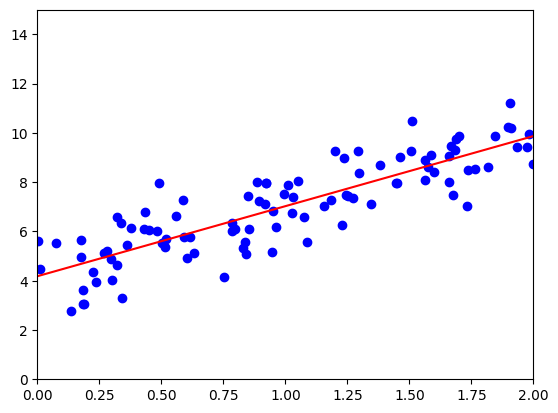

In [12]:
# plotting model's predictions

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.scatter(X, y, color="blue", label="Data points")
plt.axis([0, 2, 0, 15])
plt.show()

In [14]:
# linear regression using Scikit-Learn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.18217234]), array([[2.84342935]]))

In [15]:
lin_reg.predict(X_new)

array([[4.18217234],
       [9.86903104]])

In [16]:
# LinearRegression class is based on the scipy.linalg.lstsq() function (least squares), which you can call directly:

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.18217234],
       [2.84342935]])

In [17]:
residuals

array([93.44872966])

In [18]:
rank

2

In [20]:
# using np.linalg.pinv() to compute the pseudoinverse directly

np.linalg.pinv(X_b).dot(y)

array([[4.18217234],
       [2.84342935]])

In [21]:
# implementation of batch gradient descent

alpha = 0.1 #learning rate
n_iterations = 1000
m = 100 #number of examples

theta = np.random.randn(2,1) #random initializatiom

for iteration in range(n_iterations):
    gradients = (2/m) * (X_b.T).dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

theta

array([[4.18217234],
       [2.84342935]])

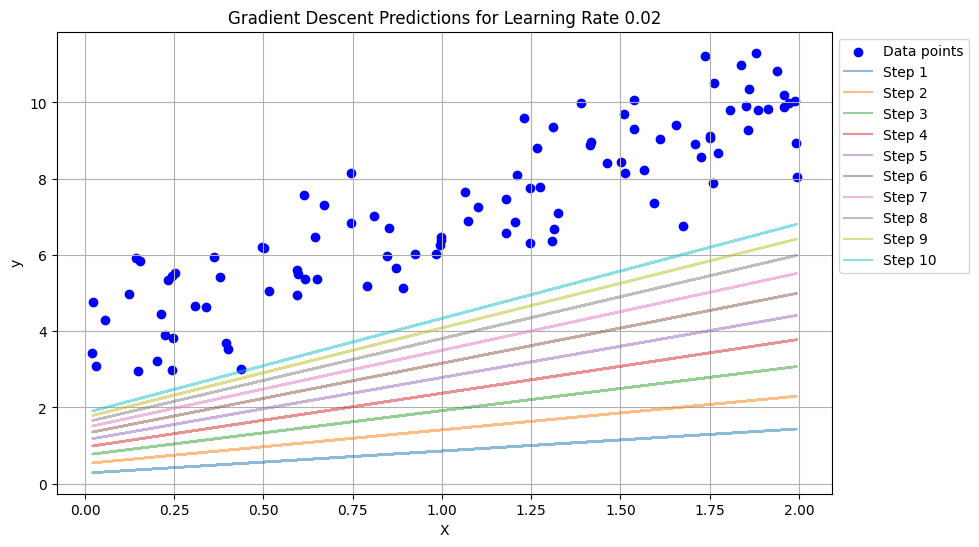

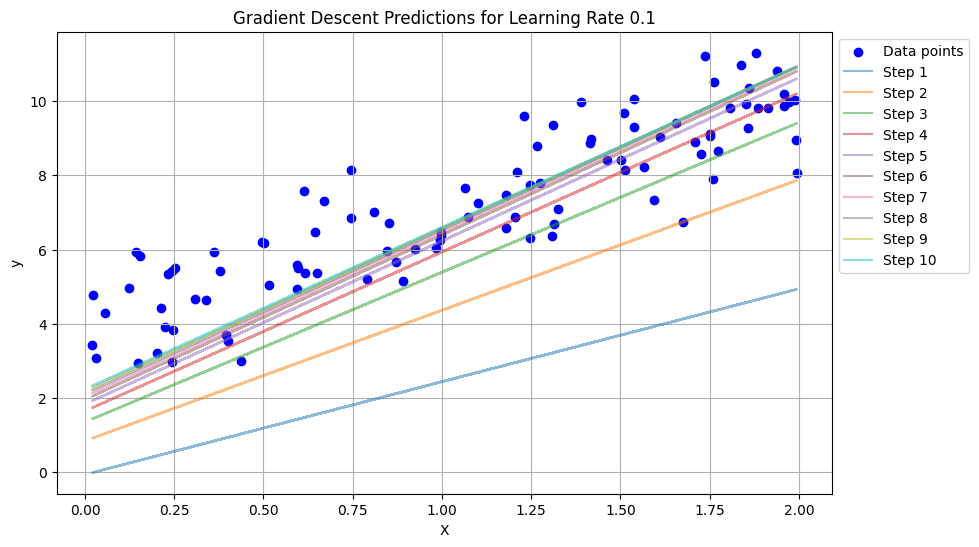

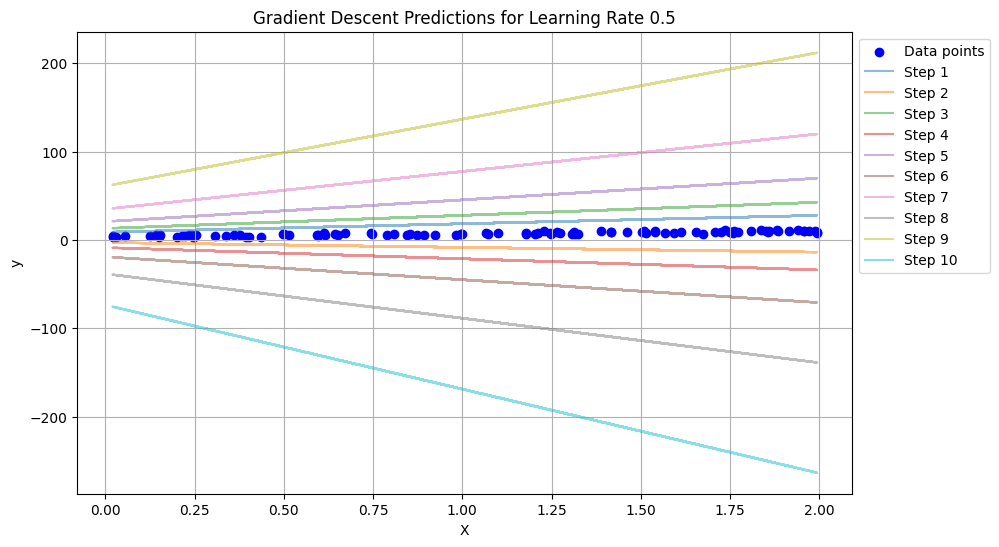

In [6]:
learning_rates = [0.02, 0.1, 0.5]
n_iterations = 10  # First 10 steps
m = 100  # Number of examples

for learning_rate in learning_rates:
    theta = np.random.randn(2, 1)  # Random initialization

    # Initialize the plot for the current learning rate
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color="blue", label="Data points")  # Original data points

    for iteration in range(n_iterations):
        # Compute gradients and update theta
        gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

        # Plot the predictions at each step
        y_predict = X_b.dot(theta)  # Predictions
        plt.plot(X, y_predict, label=f"Step {iteration + 1}", alpha=0.5)

    # Add labels, title, and legend
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Gradient Descent Predictions for Learning Rate {learning_rate}")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()